#Authors
**Author 1 (name and surname):** Alan García Justel

**Author 2 (name and surname):** < Put your name and surname here >

# Preamble: download and unzip image folder


In [ ]:
!wget -O lab1-imgs.zip https://ehubox.ehu.eus/s/mcMES3ic9nzYFi5/download
!unzip lab1-imgs.zip

--2025-02-10 14:21:50--  https://ehubox.ehu.eus/s/mcMES3ic9nzYFi5/download
Resolving ehubox.ehu.eus (ehubox.ehu.eus)... 158.227.0.95
Connecting to ehubox.ehu.eus (ehubox.ehu.eus)|158.227.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 826774 (807K) [application/zip]
Saving to: ‘lab1-imgs.zip’

lab1-imgs.zip       100%[===================>] 807.40K   889KB/s    in 0.9s    

2025-02-10 14:21:52 (889 KB/s) - ‘lab1-imgs.zip’ saved [826774/826774]

Archive:  lab1-imgs.zip
   creating: lab1-imgs/
  inflating: lab1-imgs/peppers.png   
  inflating: lab1-imgs/rice.png      


# Exercise 1
Make a function `checkMatrixType` that tests whether a given matrix is symmetric, orthogonal, singular or otherwise.

**Input:** a NumPy array representing a matrix (or image).

**Output:** a list of strings with matrix type ('symmetric', 'orthogonal', 'singular' or 'otherwise').

HINT: check NumPy array functions on the web.

Afterwards, write some code to test your new function, i.e. call the function with the three matrix types and see whether it responds suitably.

In [ ]:
import numpy as np
from typing import Union

def checkMatrixType(input_matrix: np.ndarray) -> Union['symmetric', 'orthogonal', 'singular', 'otherwise']:
    if not isinstance(input_matrix, np.ndarray):
        raise TypeError("El input debe ser un numpy.ndarray")
    # Solo matrices cuadradas pueden ser simétricas, ortogonales o singulares
    if input_matrix.shape[0] != input_matrix.shape[1]:
        return 'otherwise'
    if np.allclose(input_matrix, input_matrix.T):
        return 'symmetric'
    if np.linalg.det(input_matrix) == 0:
        return 'singular'
    if np.allclose(np.linalg.inv(input_matrix), input_matrix.T):
        return 'orthogonal'
    return 'otherwise'


test_matrices = [
    {
        'type': 'singular',
        'matrix': np.array([[1, 2, 2], [1, 2, 2], [3, 2, -1]])
    },
    {
        'type': 'orthogonal',
        'matrix': np.array([[0, 0, 1], [0, -1, 0], [-1, 0, 0]])
    },
    {
        'type': 'symetric',
        'matrix': np.array([[1, 2, 3], [2, 1, 4], [3, 4, 1]])
    }
]

for m in test_matrices:
  print(f"Real matrix type: {m['type']}\nCalculated matrix type: {checkMatrixType(m['matrix'])}\n")

Real matrix type: singular
Calculated matrix type: singular

Real matrix type: orthogonal
Calculated matrix type: orthogonal

Real matrix type: symetric
Calculated matrix type: symmetric



# Exercise 2
Make a function `rotateAndSave` that loads an image and saves it after a rotation of 90 degrees (hint: look for rotation methods in NumPy).

**Input:** image to rotate and output file name.

**Output:** rotated image.

Apply it to `peppers.png`

In [ ]:
!pip install opencv-python

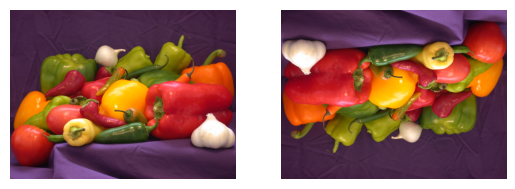

In [ ]:
import cv2
import matplotlib.pyplot as plt

def rotateAndSave(image:np.ndarray, image_save_path:str) -> np.ndarray:
  """
  INPUT: BGR np.array image and image_save_path
  RESULT: Rotated imaage saved on image_save_path
  """
  assert len(image.shape) == 3 and image.shape[2] == 3
  image = cv2.rotate(image, 1)
  cv2.imwrite(image_save_path, image)
  return image

image_path = "lab1-imgs/peppers.png"
output_path = "lab1-imgs/pepper_rotated.png"

image = cv2.imread(image_path)
rotated_image = rotateAndSave(image.copy(), output_path)

# Display images
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[1].axis('off')
plt.show()

# Exercise 3
This last exercise emphasizes the fact that we can treat an image as a vector instead of a multidimensional matrix. Treating an image as a vector has the advantage that we only need to keep track of one index instead of several. Make a function `firstMaxValue` that finds the maximum value and the corresponding position of this value (first occurrence) given in image coordinates. In this case, you will work with a grayscale image, so to load it, use `cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)` or `skimage.io.imread(..., as_gray=True)`.

**Input:** any image.

**Output:** maximum intensity value, X position and Y position.

Apply it to `rice.png`.

HINT: Check `np.unravel_index` and `np.argmax`.

Image lab1-imgs/rice.png has shape: (860, 820)
First Max Value in image is at index: 676133 and has a value of 250
Drawing First Max Value at: (453, 824)


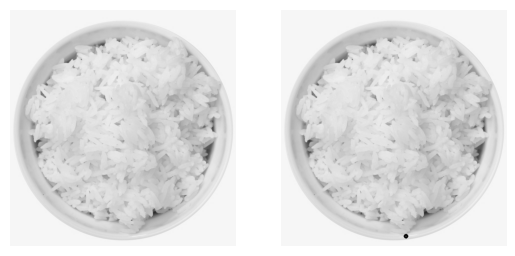

In [ ]:
from typing import Tuple

def firstMaxValue(image:np.ndarray) -> Tuple[float, int]:
  """
  INPUT: BGR numpy array image (H, W, C)
  RETURN: (MaxValue, IndexPosition)
  """
  vector_image = image.flatten()
  max_index = np.argmax(vector_image)
  max_val = vector_image[max_index]

  assert max_index != -1
  return (max_val, max_index)

image_path = "lab1-imgs/rice.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

fmv, fmi = firstMaxValue(image)

# Draw circle on pixel coords
pixel_center = np.unravel_index(fmi, shape=image.shape)[::-1]
drawed_image = cv2.circle(image.copy(), pixel_center, radius=5, color=(0, 0, 255), thickness=5)

# Show info
print(f"Image {image_path} has shape: {image.shape}")
print(f"First Max Value in image is at index: {fmi} and has a value of {fmv}")
print(f"Drawing First Max Value at: {pixel_center}")
# Display images
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(drawed_image, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[1].axis('off')
plt.show()


# Egela submission
Copy this notebook to your Drive and solve the proposed exercises there. Rename the notebook as "assignment-1-name1-surname1-name2-surname2.ipynb" (replace name1-surname1 and name2-surname2 with team member names and surnames). Use the "share" button and make sure you configure such that "Anyone on the Internet with this link can view". Copy the link provided by the "share" menu and paste it here. Only one member of the team should submit the notebook.

<font color=red>**Important**</font>: Make sure the notebook is fully run when you deliver and the "traces" are visible (run times).

**Submission deadline:** Sunday, February 16th 2025, 0:00h.